# Matematika i glazba

Pitagora je eksperimentirao s duljinom žice glazbenog instrumenta i otkrio da su dva tona konsonantna (ugodna za uho) ako su u omjeru "malih prirodnih brojeva". Ustanovio je da kad se žica smanji na pola, u omjeru 1:2, visina tona se povisi za interval oktavu, kad se žica smanji u omjeru 2:3 visina tona se povisi za interval čistu kvintu, a omjer 3:4 daje interval čistu kvartu. 

In [145]:
import numpy as np
import IPython.display as ipd
sr = 22050 
T = 2.0
t = np.linspace(0,T,int(T*sr),endpoint=False)
def sinusoida(A,f,t):
    return A*np.sin(2*np.pi*f*t)
x = sinusoida(0.5,440,t)
ipd.Audio(x,rate=sr) # osnovni ton A

In [202]:
y1 = sinusoida(0.5,2*440,t)
ipd.Audio([x, y1],rate=sr) # oktava

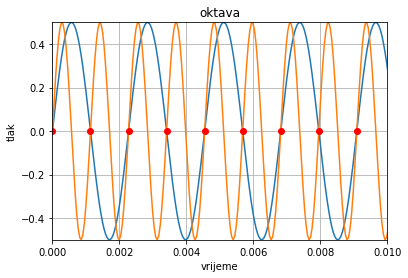

In [199]:
%matplotlib inline
import matplotlib.pyplot as plt

from scipy.optimize import fsolve

def crtajsinusoide(v1,v2,s):
    plt.xlabel('vrijeme')
    plt.ylabel('tlak')
    plt.title(s)
    plt.grid(True)
    plt.axis([0,0.01,-0.5,0.5])
    plt.plot(t,v1)
    plt.plot(t,v2)
    return

def findIntersection(fun1,fun2,frek1,frek2,x0):
    return fsolve(lambda x : fun1(0.5,frek1,x) - fun2(0.5,frek2,x),x0)

def crtajpresjek(fun1,fun2,frek1,frek2):
    x=0
    eps=10**(-10)
    for i in range(9):
        result = findIntersection(fun1,fun2,frek1,frek2,x)
        x+=1/(2*frek1)
        if(np.absolute(sinusoida(0.5,frek1,result)) < eps):
            plt.plot(result,0,'ro')
    return

crtajsinusoide(x,y1,"oktava")
crtajpresjek(sinusoida,sinusoida,440,880)

In [149]:
y2 = sinusoida(0.5,3/2*440,t)
ipd.Audio([x, y2],rate=sr) # čista kvinta

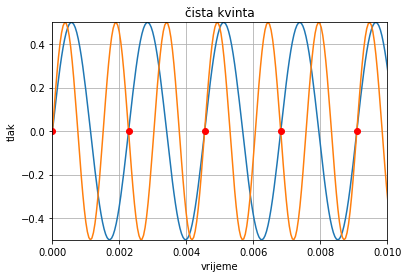

In [194]:
crtajsinusoide(x,y2,"čista kvinta")
crtajpresjek(sinusoida,sinusoida,440,3/2*440)

In [151]:
y3 = sinusoida(0.5,4/3*440,t)
ipd.Audio([x, y3],rate=sr) # čista kvarta

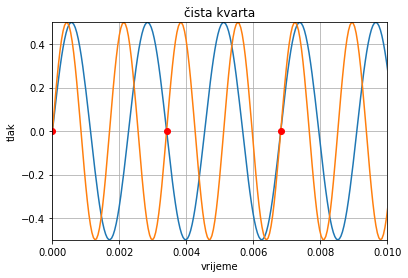

In [195]:
crtajsinusoide(x,y3,"čista kvarta")
crtajpresjek(sinusoida,sinusoida,440,4/3*440)

In [200]:
y4 = sinusoida(0.5,729/512*440,t)
ipd.Audio([x, y4],rate=sr) # primjer nekonsonantnog intervala

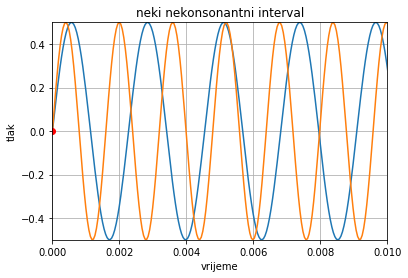

In [201]:
crtajsinusoide(x,y4,"neki nekonsonantni interval")
crtajpresjek(sinusoida,sinusoida,440,729/512*440)


Please wait a moment while I gather a list of all available modules...



C:\ProgramData\Anaconda3\lib\site-packages\IPython\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
C:\ProgramData\Anaconda3\lib\site-packages\odo\backends\pandas.py:102: FutureWarning: pandas.tslib i

Crypto              builtins            mkl                 spyder_io_dcm
Cython              bz2                 mmap                spyder_io_hdf5
IPython             cProfile            mmapfile            spyder_profiler
OpenSSL             calendar            mmsystem            spyder_pylint
PIL                 certifi             modulefinder        sqlalchemy
PyQt5               cffi                mpmath              sqlite3
__future__          cgi                 msgpack             sre_compile
_ast                cgitb               msilib              sre_constants
_asyncio            chardet             msvcrt              sre_parse
_bisect             chunk               multipledispatch    ssl
_blake2             click               multiprocessing     sspi
_bootlocale         cloudpickle         navigator_updater   sspicon
_bz2                clyent              nbconvert           stat
_cffi_backend       cmath               nbformat            statistics
_codecs      